In [1]:
#This is a Random Forest Model, where i used a Linear Regression to predict the prices of the califonira housing dataset
# The dataset is avaliable here: https://www.kaggle.com/datasets/camnugent/california-housing-prices


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv(r"C:\Users\quint\Music\Limbo\Databse\housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

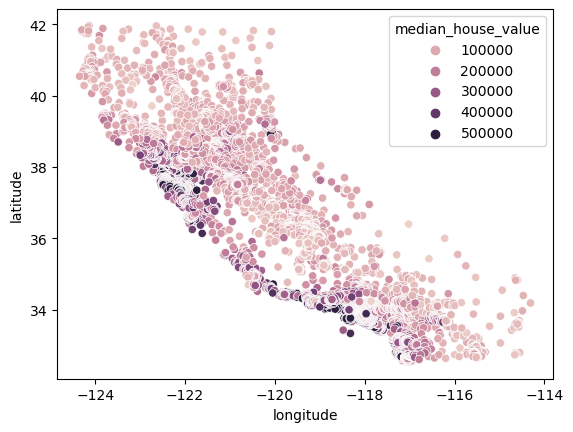

In [3]:
sns.scatterplot(data=data, x=data['longitude'], y=data['latitude'], hue=data["median_house_value"])

#The first thing will be, have a visual representation on how the prices are distribuited in the city

<BarContainer object of 5 artists>

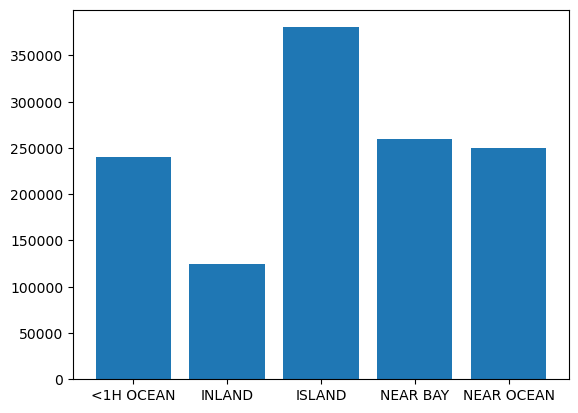

In [4]:
mean_values = data.groupby('ocean_proximity')['median_house_value'].mean()

plt.bar(mean_values.index, mean_values.values)

#With this is easy to see the beach influence in the prices

In [5]:
data.loc[data["ocean_proximity"] == 'NEAR BAY', 'Near_Bay'] = 1
data.loc[data["ocean_proximity"] != 'NEAR BAY', 'Near_Bay'] = 0

data.loc[data["ocean_proximity"] =='<1H OCEAN', 'Minus_1H_OCEAN'] = 1
data.loc[data["ocean_proximity"] != '<1H OCEAN', 'Minus_1H_OCEAN'] = 0

data.loc[data["ocean_proximity"] == 'NEAR OCEAN', 'NEAR_OCEAN'] = 1
data.loc[data["ocean_proximity"] != 'NEAR OCEAN', 'NEAR_OCEAN'] = 0

data.loc[data["ocean_proximity"] == 'ISLAND', 'ISLAND'] = 1
data.loc[data["ocean_proximity"] != 'ISLAND', 'ISLAND'] = 0

data.loc[data["ocean_proximity"] == 'INLAND', 'INLAND'] = 1
data.loc[data["ocean_proximity"] != 'INLAND', 'INLAND'] = 0
data

# In this way, the system can make sense of the data.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Near_Bay,Minus_1H_OCEAN,NEAR_OCEAN,ISLAND,INLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.0,0.0,0.0,0.0,1.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.0,0.0,0.0,0.0,1.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.0,0.0,0.0,0.0,1.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.0,0.0,0.0,0.0,1.0


In [6]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'Near_Bay', 'Minus_1H_OCEAN',
       'NEAR_OCEAN', 'ISLAND', 'INLAND'],
      dtype='object')

In [7]:
california_data= data[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value','Near_Bay', 'Minus_1H_OCEAN',
       'NEAR_OCEAN', 'ISLAND', 'INLAND']]
california_data

#We choose the data that will be used in the system.

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Near_Bay,Minus_1H_OCEAN,NEAR_OCEAN,ISLAND,INLAND
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0,0.0,0.0,0.0,0.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,0.0,0.0,0.0,0.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,0.0,0.0,0.0,1.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,0.0,0.0,0.0,1.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,0.0,0.0,0.0,1.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,0.0,0.0,0.0,1.0


In [8]:
california_data[california_data.isnull().any(axis=1)]

#Checking for null data, that can interfere in the results

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Near_Bay,Minus_1H_OCEAN,NEAR_OCEAN,ISLAND,INLAND
290,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,1.0,0.0,0.0,0.0,0.0
341,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,1.0,0.0,0.0,0.0,0.0
538,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,1.0,0.0,0.0,0.0,0.0
563,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,1.0,0.0,0.0,0.0,0.0
696,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20267,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,0.0,0.0,1.0,0.0,0.0
20268,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,0.0,0.0,1.0,0.0,0.0
20372,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,0.0,1.0,0.0,0.0,0.0
20460,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,0.0,1.0,0.0,0.0,0.0


In [9]:
california_data= california_data.dropna()
california_data

#Eliminating the null data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Near_Bay,Minus_1H_OCEAN,NEAR_OCEAN,ISLAND,INLAND
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0,0.0,0.0,0.0,0.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,0.0,0.0,0.0,0.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,0.0,0.0,0.0,1.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,0.0,0.0,0.0,1.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,0.0,0.0,0.0,1.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,0.0,0.0,0.0,1.0


In [10]:
california_train= california_data["median_house_value"]
california_train

#This is our target for the model

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
new_data= california_data.drop(["median_house_value"],axis=1)
new_data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Near_Bay,Minus_1H_OCEAN,NEAR_OCEAN,ISLAND,INLAND
0,41.0,880.0,129.0,322.0,126.0,8.3252,1.0,0.0,0.0,0.0,0.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1.0,0.0,0.0,0.0,0.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,1.0,0.0,0.0,0.0,0.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,1.0,0.0,0.0,0.0,0.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,0.0,0.0,0.0,1.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,0.0,0.0,0.0,1.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,0.0,0.0,0.0,1.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,0.0,0.0,0.0,1.0


In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(new_data,california_train, test_size= 0.3)

#Separating the train and test data, with 30% being used for test.

In [13]:
from sklearn.ensemble import RandomForestRegressor

regresso= RandomForestRegressor()
regresso.fit(x_train,y_train)

#Implementing the Random Forest

RandomForestRegressor()

In [14]:
y_pred= regresso.predict(x_test)

# Making the prediction

In [15]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2= r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

media = data["median_house_value"].mean()

print(f""" MSE= {mse} , RMSE = {rmse} R2= {r2} , mae={mae},
      House Value Mean = {media}""")


#This way we can use various ways to evaluate the model, we can see that the predict was really good.
# This shows that the model used could predict in a efficient way the data. Keeping in mind that the error in a 
# Rental system, even when is low, means a couple thousand dollars

 MSE= 3862116337.880442 , RMSE = 62145.92776586767 R2= 0.7051800371326185 , mae=43632.618988580754,
      House Value Mean = 206855.81690891474


In [16]:
help(RandomForestRegressor)

#This way i see the criterias i wanna change, to test the model with different configurations.

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimato

In [17]:
regresso= RandomForestRegressor(ccp_alpha=0.1,random_state=39)
regresso.fit(x_train,y_train)

y_pred= regresso.predict(x_test)


r2= r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

media = data["median_house_value"].mean()

print(f""" MSE= {mse} , RMSE = {rmse} R2= {r2} , mae={mae},
      House Value Mean = {media}""")


#We make the same training system, but in this case we have a ccp_alpha of 0.1 and the randon_state of 39.
# The results stay basic the same.

 MSE= 3869665786.4051347 , RMSE = 62206.6378001989 R2= 0.7046037395954654 , mae=43598.781158707934,
      House Value Mean = 206855.81690891474


In [18]:
regresso= RandomForestRegressor(random_state=39,max_depth = 5)
regresso.fit(x_train,y_train)

y_pred= regresso.predict(x_test)


r2= r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

media = data["median_house_value"].mean()

print(f""" MSE= {mse} , RMSE = {rmse} R2= {r2} , mae={mae},
      House Value Mean = {media}""")

# This time with the same Random_State, but liminting the leaf depth, we get worse results, what is expected.
# Using this can prevent overfiting, but the results on the system will be worst.

 MSE= 4972835004.27398 , RMSE = 70518.33098049031 R2= 0.6203917999761055 , mae=50232.288095383476,
      House Value Mean = 206855.81690891474


In [19]:

regresso= RandomForestRegressor(random_state=39,bootstrap= False)
regresso.fit(x_train,y_train)

y_pred= regresso.predict(x_test)


r2= r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

media = data["median_house_value"].mean()

print(f""" MSE= {mse} , RMSE = {rmse} R2= {r2} , mae={mae},
      House Value Mean = {media}""")

# This time with the same Random State again, the bootstrap is not used.
# With this we have the worst system of all, what shows why we use the bootstrap

 MSE= 6650021879.998906 , RMSE = 81547.66630627087 R2= 0.4923614329017024 , mae=57004.628504078304,
      House Value Mean = 206855.81690891474
